In [3]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# # clean df and prep for ML
df = pd.read_csv("top_1000_from_boris_data.csv")
dropped_df = df.drop(['name','background_image','Unnamed: 0','Unnamed: 0.1','owners',
'platform_3do', 'platform_atari',
       'platform_commodore / amiga', 'platform_sega', 'platform_neo geo',
       'platform_web', 'platform_linux', 'platform_android',
       'platform_nintendo', 'platform_apple macintosh', 'platform_ios',
       'platform_xbox', 'platform_playstation', 'platform_pc','genre_action', 'genre_adventure', 'genre_arcade', 'genre_board games',
       'genre_card', 'genre_casual', 'genre_educational', 'genre_family',
       'genre_fighting', 'genre_indie', 'genre_massively multiplayer',
       'genre_platformer', 'genre_puzzle', 'genre_rpg', 'genre_racing',
       'genre_shooter', 'genre_simulation', 'genre_sports', 'genre_strategy'], axis = 1)
dropped_df["Price"] = dropped_df['price']/100
df = dropped_df.drop(["price"], axis = 1)
# print(df.columns)
# bin target ratings 
bins = [-0.1,.60,.70,.80,.90,1]
group_names = ["F",'D','C','B','A']
df['Letter_Rating'] = pd.cut(df['review_score'], bins, labels = group_names)
df2 = df.drop(columns=['review_score'])

# check bins 
df2['Letter_Rating'].value_counts()
df2.head()

,tag_local multiplayer,tag_fantasy,tag_violent,tag_free to play,tag_anime,tag_online multiplayer,tag_great soundtrack,tag_split screen,tag_pixel graphics,tag_story rich,...,3g,3b,4r,4g,4b,5r,5g,5b,Price,Letter_Rating
0,0,0,0,0,0,0,1,0,0,1,...,209.184441,131.045892,140.576923,65.307692,20.461538,218.308442,163.866883,89.957792,14.99,A
1,0,0,1,0,0,0,0,0,0,1,...,122.741313,86.528958,3.697745,3.258890,2.798786,86.730038,73.893536,52.433460,19.99,B
2,0,0,0,0,0,0,0,1,0,0,...,32.943830,38.464681,235.745614,137.581140,94.778509,103.002105,60.667368,54.352632,39.99,B
3,1,0,0,0,0,0,1,1,0,0,...,208.548063,159.460545,165.079121,53.804396,30.857143,44.578512,132.473140,105.456612,29.99,A
4,0,0,0,0,0,0,0,0,0,0,...,14.708148,14.708148,208.757840,208.594077,208.608014,79.143750,78.609375,78.628125,19.99,A


In [5]:
# dum and scale data 
# dum data
target = df2['Letter_Rating']
X = df2.drop(['Letter_Rating'], axis = 1)

dum_df = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(dum_df,target)

# scale data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# ls = LogisticRegression()
# rf = RandomForestClassifier()

k: 1, Train/Test Score: 1.000/0.316
k: 3, Train/Test Score: 0.632/0.304
k: 5, Train/Test Score: 0.549/0.292
k: 7, Train/Test Score: 0.513/0.352
k: 9, Train/Test Score: 0.497/0.340
k: 11, Train/Test Score: 0.487/0.336
k: 13, Train/Test Score: 0.451/0.344
k: 15, Train/Test Score: 0.434/0.348
k: 17, Train/Test Score: 0.429/0.332
k: 19, Train/Test Score: 0.438/0.352


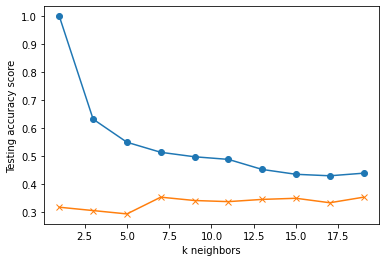

In [6]:
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()